In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data/AllIndiaBulletins_Master.csv')
df = df[df.City == 'Delhi']
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['mm-yy'] = df['date'].dt.strftime('%b-%d') #Remove year from timestamp
df.set_index('date', inplace=True)
df = df['2019-01-01':]
df

C:\Users\dskcy\AppData\Local\Temp\ipykernel_10592\2599116084.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/AllIndiaBulletins_Master.csv')


,City,No. Stations,Air Quality,Index Value,Prominent Pollutant,year,mm-yy
date,,,,,,,
2019-01-01,Delhi,35,Very Poor,393,"PM10, PM2.5",2019,Jan-01
2019-01-02,Delhi,30,Severe,430,PM2.5,2019,Jan-02
2019-01-03,Delhi,35,Severe,444,"PM10, PM2.5",2019,Jan-03
2019-01-04,Delhi,35,Very Poor,386,PM2.5,2019,Jan-04
2019-01-05,Delhi,34,Severe,407,PM2.5,2019,Jan-05
...,...,...,...,...,...,...,...
2023-12-27,Delhi,38,Very Poor,380,PM2.5,2023,Dec-27
2023-12-28,Delhi,38,Very Poor,358,PM2.5,2023,Dec-28
2023-12-29,Delhi,36,Very Poor,382,PM2.5,2023,Dec-29


In [3]:
color_dict = {
              2019: '#808080',
              2020: '#ff0000',
              2021: '#4ea72e',
              2022: '#4e95d9',
              2023: '#215f9a',
              2024: '#3B3F44'
              }

In [4]:
df_pivot = pd.pivot_table(df,
                          index=['mm-yy'],
                          columns='year',
                          values='Index Value').reset_index()
df_pivot.set_index('mm-yy',inplace=True)
df_pivot

year,2019,2020,2021,2022,2023
mm-yy,,,,,
Apr-01,151.0,73.0,182.0,218.0,106.0
Apr-02,198.0,69.0,176.0,226.0,128.0
Apr-03,187.0,79.0,159.0,245.0,179.0
Apr-04,254.0,87.0,171.0,262.0,109.0
Apr-05,264.0,102.0,205.0,233.0,135.0
...,...,...,...,...,...
Sep-26,74.0,165.0,75.0,100.0,152.0
Sep-27,63.0,117.0,108.0,108.0,129.0
Sep-28,67.0,159.0,120.0,140.0,137.0


In [5]:
## SORT THE  DATETIME INDEX WHICH IS IN STRING FORMAT ##
# Convert the index to datetime
df_pivot.index = pd.to_datetime(df_pivot.index + '-2000', format='%b-%d-%Y')
# Sort the DataFrame by the datetime index
df_pivot = df_pivot.sort_index()
# Remove the year from the index
df_pivot.index = df_pivot.index.strftime('%b-%d')
df_pivot

year,2019,2020,2021,2022,2023
mm-yy,,,,,
Jan-01,393.0,437.0,441.0,362.0,259.0
Jan-02,430.0,417.0,443.0,404.0,357.0
Jan-03,444.0,352.0,354.0,387.0,385.0
Jan-04,386.0,334.0,151.0,378.0,343.0
Jan-05,407.0,330.0,140.0,397.0,340.0
...,...,...,...,...,...
Dec-27,373.0,396.0,283.0,339.0,380.0
Dec-28,409.0,253.0,305.0,321.0,358.0
Dec-29,431.0,265.0,267.0,306.0,382.0


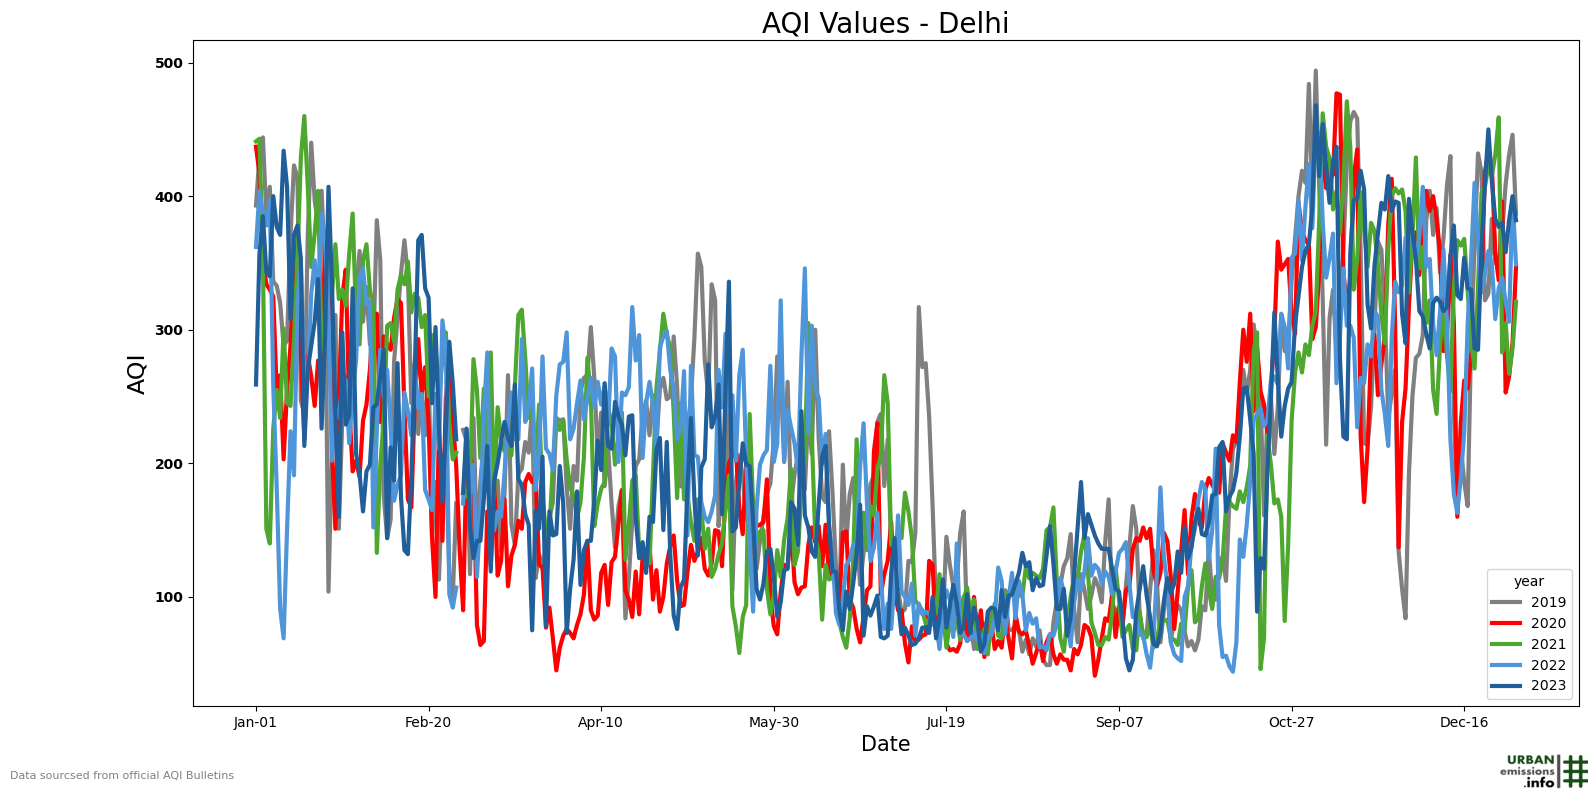

In [9]:
df_pivot.plot(figsize=(16, 8),
        color=[color_dict.get(x) for x in df_pivot.columns],
        linewidth = 3)

plt.title('AQI Values - Delhi', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('AQI', fontsize=17)

plt.yticks(fontweight='bold', fontsize=10)

# Add data source annotation
data_source_annotation = '''Data sourcsed from official AQI Bulletins'''

plt.text(0.01, 0.02, data_source_annotation, fontsize=8, color='gray', transform=plt.gcf().transFigure)

# Load the image
logo = plt.imread('assets/logo.grid.3_transp.png')  # Provide the path to your image file
plt.figimage(logo, xo=1500, yo=0.02)
plt.tight_layout()
plt.savefig('visuals/seasonplot_aqi.png')
plt.show()

Here we plotted daily AQI values. We can instead plot weekly/monthly averages as well.